# CanESM5 GMD paper Figure 22
## Ocean BGC maps at various depths


### history
2019-04-04 NCS basic look


In [1]:
import xarray as xr
import numpy as np
import matplotlib as mpl
from mpl_toolkits.axes_grid1 import make_axes_locatable
import matplotlib.pyplot as plt
%matplotlib inline
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import cmocean
import iris
import iris.analysis.cartography
import iris.quickplot as qplt
import iris.plot as iplt
from cdo import *
import modules.basic_stats as bst
import modules.plotting_module as pltm
import sqlite3

cdo = Cdo()
cdo.setCdo('/home/ords/crd/ccrn/scrd104/miniconda3/bin/cdo')

/home/ords/crd/ccrn/scrd104/miniconda3/lib/python3.6/site-packages/dask/config.py:168: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  data = yaml.load(f.read()) or {}
/home/ords/crd/ccrn/scrd104/miniconda3/lib/python3.6/site-packages/distributed/config.py:20: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  defaults = yaml.load(f)


In [2]:
#constants

%store -r start 
%store -r end
%store -r color_dict

In [3]:
#cdo remapping to the WOA09 grid horizontall, and vertically interpolating to the WOA09 depths.

datapath='input_data/CanESM5_cmip_dir/historical/r1i1p1f1/Omon/fgco2/gn/v20190306/'

regrid=False
if regrid:
    cdo.remapbil('input_data/obs/woa/woa09/uncs_woa09_ann_tpot.nc', input=datapath+'fgco2_Omon_CanESM5_historical_r1i1p1f1_gn_185001-201412.nc', 
                 output='input_data/processed_data/remap-woa09_fgco2_Omon_CanESM5_historical_r1i1p1f1_gn_185001-201412.nc', options='-L')
    canesm2_fgco2='input_data/CanESM2_large_ensemble/historical-r1/mon/ocnBgchem/fgco2/r1i1p1/fgco2_Omon_CanESM2_historical-r1_r1i1p1_195001-202012.nc'
    cdo.remapbil('input_data/obs/woa/woa09/uncs_woa09_ann_tpot.nc', input=canesm2_fgco2, 
                 output='input_data/processed_data/remap-woa09_fgco2_Omon_CanESM2_historical-r1_r1i1p1_195001-202012.nc', options='-L')
    cdo.remapbil('input_data/obs/woa/woa09/uncs_woa09_ann_tpot.nc', input='/space/hall2/sitestore/eccc/crd/ccrn/users/scrd104/obs4comp/landschuetzer/fgco2_landschuetzer.nc', 
                 output='input_data/processed_data/remap-woa09_fgco2_landschuetzer.nc', options='-L')   

In [4]:
# Load the data created in the fig 15 notebooks for BGC sections

mask = xr.open_dataset('input_data/processed_data/remap_vertint-woa09_dissic_Omon_CanESM5_historical_r1i1p1f1_gn_198101-201012.nc')['dissic']
mask2 = mask[0,...].sel(lev=10).where( (mask.lat>40) & (mask.lat<47) & (mask.lon>25) & (mask.lon<45))

dissic = xr.open_dataset('input_data/processed_data/remap_vertint-woa09_dissic_Omon_CanESM5_historical_r1i1p1f1_gn_198101-201012.nc')['dissic'].squeeze()*1e6/1035#.where( np.isnan(mask2), np.nan)
no3 = xr.open_dataset('input_data/processed_data/remap_vertint-woa09_no3_Omon_CanESM5_historical_r1i1p1f1_gn_198101-201012.nc')['no3'].squeeze()*1e6/1035#.where( np.isnan(mask2), np.nan)
o2 = xr.open_dataset('input_data/processed_data/remap_vertint-woa09_o2_Omon_CanESM5_historical_r1i1p1f1_gn_198101-201012.nc')['o2'].squeeze()*1e6/1035#.where( np.isnan(mask2), np.nan)

dissic_obs = xr.open_dataset('input_data/processed_data/remap_vertint-woa09_reformatted_GLODAPv2.2016b.TCO2.nc', decode_times=False)['TCO2'].rename( {'depth':'lev'}).squeeze()#.where( np.isnan(mask2), np.nan)
no3_obs=xr.open_dataset('input_data/processed_data/remap_vertint-woa09_reformatted_GLODAPv2.2016b.NO3.nc')['NO3'].rename( {'depth':'lev'}).squeeze()#.where( np.isnan(mask2), np.nan)
o2_obs=xr.open_dataset('input_data/processed_data/remap_vertint-woa09_reformatted_GLODAPv2.2016b.oxygen.nc')['oxygen'].rename( {'depth':'lev'}).squeeze()#.where( np.isnan(mask2), np.nan)

In [5]:
# Load the data created in the fig 15 notebooks for BGC sections
#mask = xr.open_dataset('processed_data/remap_vertint-woa09_dissic_Omon_CanESM5_historical_r1i1p1f1_gn_198101-201012.nc')['dissic']
#mask2 = mask[0,...].sel(lev=10).where( (mask.lat>40) & (mask.lat<47) & (mask.lon>25) & (mask.lon<45))

fgco2 = (xr.open_dataset('input_data/processed_data/remap-woa09_fgco2_Omon_CanESM5_historical_r1i1p1f1_gn_185001-201412.nc')['fgco2']*1e9).sel(time=slice(start, end))
fgco2_mean = fgco2.mean(dim='time')

fgco2_obs=(xr.open_dataset('input_data/processed_data/remap-woa09_fgco2_landschuetzer.nc')['fgco2']*1e9).sel(time=slice(start, end))
fgco2_obs_mean = fgco2_obs.mean(dim='time')

fgco2_canesm2 = (xr.open_dataset('input_data/processed_data/remap-woa09_fgco2_Omon_CanESM2_historical-r1_r1i1p1_195001-202012.nc')['fgco2']*1e9*12/44.).sel(time=slice(start, end))
fgco2_mean_canesm2 = fgco2_canesm2.mean(dim='time')
miss = fgco2_mean_canesm2.isel(lon=0,lat=0)
fgco2_mean_canesm2 = fgco2_mean_canesm2.where(fgco2_mean_canesm2 != miss)

/home/ords/crd/ccrn/scrd104/miniconda3/lib/python3.6/site-packages/xarray/core/nanops.py:159: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)
/home/ords/crd/ccrn/scrd104/miniconda3/lib/python3.6/site-packages/xarray/core/nanops.py:159: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


/home/ords/crd/ccrn/scrd104/miniconda3/lib/python3.6/site-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "
/home/ords/crd/ccrn/scrd104/miniconda3/lib/python3.6/site-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "
/home/ords/crd/ccrn/scrd104/mi

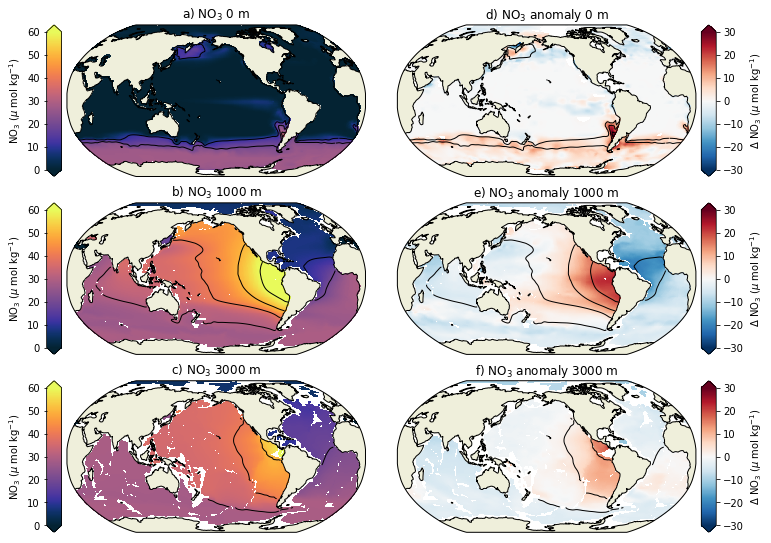

In [6]:
#plotting - CanESM5 means and anomalies for NO3

fig, ((axtl, axt), (axml, axm), (axbl, axb)) = plt.subplots(3, 2, figsize=(12,12), subplot_kw=dict(projection=ccrs.Robinson(central_longitude=200)))
fig.subplots_adjust(wspace=0.1, hspace=-0.4)

cmap=cmocean.cm.thermal
#cmap.set_bad([0.5, 0.5, 0.5])
cb = axtl.pcolormesh(no3.lon, no3.lat, no3.sel(lev=0), vmin=0,vmax=60, cmap=cmap, transform=ccrs.PlateCarree())
pltm.add_cbar('left', fig, axtl, cb, extend='both', label=r'NO$_3$ ($\mu$ mol kg$^{-1}$)')
cs=axtl.contour(no3.lon, no3.lat, no3.sel(lev=0), np.arange(0,61,10), colors='k', transform=ccrs.PlateCarree(), linewidths=1)
#axt.clabel(cs, inline=1, fontsize=10)
axtl.set_title('a) NO$_3$ 0 m')

cb = axml.pcolormesh(no3.lon, no3.lat, no3.sel(lev=1000), vmin=0,vmax=60, cmap=cmap, transform=ccrs.PlateCarree())
pltm.add_cbar('left', fig, axml, cb, extend='both', label=r'NO$_3$ ($\mu$ mol kg$^{-1}$)')
cs=axml.contour(no3.lon, no3.lat, no3.sel(lev=1000), np.arange(0,61,10), colors='k', transform=ccrs.PlateCarree(), linewidths=1)
#axt.clabel(cs, inline=1, fontsize=10)
axml.set_title('b) NO$_3$ 1000 m')

cb = axbl.pcolormesh(no3.lon, no3.lat, no3.sel(lev=3000), vmin=0,vmax=60, cmap=cmap, transform=ccrs.PlateCarree())
pltm.add_cbar('left', fig, axbl, cb, extend='both', label=r'NO$_3$ ($\mu$ mol kg$^{-1}$)')
cs=axbl.contour(no3.lon, no3.lat, no3.sel(lev=3000), np.arange(0,61,10), colors='k', transform=ccrs.PlateCarree(), linewidths=1)
#axt.clabel(cs, inline=1, fontsize=10)
axbl.set_title('c) NO$_3$ 3000 m')

# Anomalies
cmap=plt.cm.RdBu_r
#cmap.set_bad([0.5, 0.5, 0.5])
cb = axt.pcolormesh(no3.lon, no3.lat, no3.sel(lev=0) - no3_obs.sel(lev=0), vmin=-30,vmax=30, cmap=cmap, transform=ccrs.PlateCarree())
pltm.add_cbar('right', fig, axt, cb, extend='both', label=r'$\Delta$ NO$_3$ ($\mu$ mol kg$^{-1}$)')
cs=axt.contour(no3.lon, no3.lat, no3.sel(lev=0), np.arange(0,61,10), colors='k', transform=ccrs.PlateCarree(), linewidths=1)
#axt.clabel(cs, inline=1, fontsize=10)
axt.set_title('d) NO$_3$ anomaly 0 m')

cb = axm.pcolormesh(no3.lon, no3.lat, no3.sel(lev=1000) - no3_obs.sel(lev=1000), vmin=-30,vmax=30, cmap=cmap, transform=ccrs.PlateCarree())
pltm.add_cbar('right', fig, axm, cb, extend='both', label=r'$\Delta$ NO$_3$ ($\mu$ mol kg$^{-1}$)')
cs=axm.contour(no3.lon, no3.lat, no3.sel(lev=1000), np.arange(0,61,10), colors='k', transform=ccrs.PlateCarree(), linewidths=1)
#axt.clabel(cs, inline=1, fontsize=10)
axm.set_title('e) NO$_3$ anomaly 1000 m')

cb = axb.pcolormesh(no3.lon, no3.lat, no3.sel(lev=3000) - no3_obs.sel(lev=3000), vmin=-30,vmax=30, cmap=cmap, transform=ccrs.PlateCarree())
pltm.add_cbar('right', fig, axb, cb, extend='both', label=r'$\Delta$ NO$_3$ ($\mu$ mol kg$^{-1}$)')
cs=axb.contour(no3.lon, no3.lat, no3.sel(lev=3000), np.arange(0,61,10), colors='k', transform=ccrs.PlateCarree(), linewidths=1)
#axt.clabel(cs, inline=1, fontsize=10)
axb.set_title('f) NO$_3$ anomaly 3000 m')

for ax in [axt, axm, axb, axtl, axml, axbl]:
    ax.coastlines()
    ax.add_feature(cfeature.LAND)

fig.savefig('plots/fig-X22_bgc-maps.png', bbox_inches='tight')

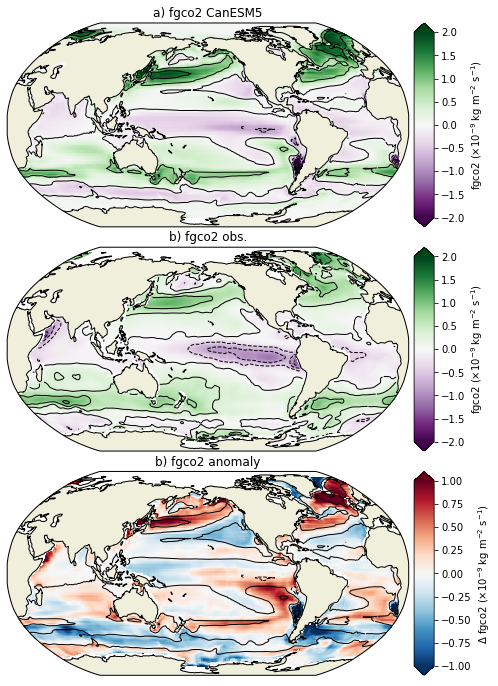

In [7]:
#plotting - CanESM5 and obs mean, and anomaly for fgco2

fig, (axtl, axm, axt) = plt.subplots(3, 1, figsize=(8,12), subplot_kw=dict(projection=ccrs.Robinson(central_longitude=200)))
fig.subplots_adjust(wspace=0.4, hspace=0.1)

cmap=plt.cm.PRGn
#cmap.set_bad([0.5, 0.5, 0.5])
cb = axtl.pcolormesh(fgco2.lon, fgco2.lat, fgco2_mean, cmap=cmap, transform=ccrs.PlateCarree(), vmin=-2, vmax=2)
pltm.add_cbar('right', fig, axtl, cb, extend='both', label=r'fgco2 ($\times 10^{-9}$ kg m$^{-2}$ s$^{-1}$)')
cs=axtl.contour(fgco2.lon, fgco2.lat, fgco2_mean, 10, colors='k', transform=ccrs.PlateCarree(), linewidths=1)
#axt.clabel(cs, inline=1, fontsize=10)
axtl.set_title('a) fgco2 CanESM5')

cb = axm.pcolormesh(fgco2.lon, fgco2.lat, fgco2_obs_mean, cmap=cmap, transform=ccrs.PlateCarree(), vmin=-2, vmax=2)
pltm.add_cbar('right', fig, axm, cb, extend='both', label=r'fgco2 ($\times 10^{-9}$ kg m$^{-2}$ s$^{-1}$)')
cs=axm.contour(fgco2.lon, fgco2.lat, fgco2_obs_mean, 10, colors='k', transform=ccrs.PlateCarree(), linewidths=1)
#axt.clabel(cs, inline=1, fontsize=10)
axm.set_title('b) fgco2 obs.')


# Anomalies
cmap=plt.cm.RdBu_r
#cmap.set_bad([0.5, 0.5, 0.5])
cb = axt.pcolormesh(fgco2.lon, fgco2.lat, fgco2_mean - fgco2_obs_mean, cmap=cmap, transform=ccrs.PlateCarree(), vmin=-1, vmax=1)
pltm.add_cbar('right', fig, axt, cb, extend='both', label=r'$\Delta$ fgco2 ($\times 10^{-9}$ kg m$^{-2}$ s$^{-1}$)')
cs=axt.contour(fgco2.lon, fgco2.lat, fgco2_mean, 10, colors='k', transform=ccrs.PlateCarree(), linewidths=1)
#axt.clabel(cs, inline=1, fontsize=10)
axt.set_title('b) fgco2 anomaly')

# Zonal means
#axb.plot(fgco2.lat, fgco2_mean.mean(dim='lon'))
#axb.plot(fgco2.lat, fgco2_obs_mean.mean(dim='lon'))

for ax in [axt, axtl, axm]:
    ax.coastlines()
    ax.add_feature(cfeature.LAND)    

fig.savefig('plots/fig-X22_fgco2-map.png', bbox_inches='tight')

/home/ords/crd/ccrn/scrd104/miniconda3/lib/python3.6/site-packages/xarray/core/nanops.py:159: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


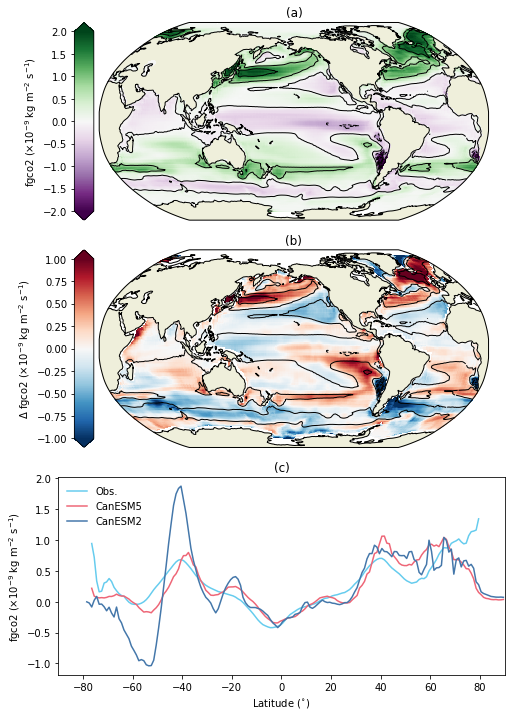

In [8]:
#plotting - CanESM5 mean and anomaly for fgco2; and zonal mean for CanESM5, CanESM2, and obs for fgco2


fig = plt.figure(figsize=(8, 12), constrained_layout=False)
outer_grid = fig.add_gridspec(3, 1, wspace=0.25, hspace=0.15)

axt = plt.subplot(outer_grid[0], projection=ccrs.Robinson(central_longitude=200))
axm = plt.subplot(outer_grid[1], projection=ccrs.Robinson(central_longitude=200))
axb = plt.subplot(outer_grid[2])

cmap=plt.cm.PRGn
#cmap.set_bad([0.5, 0.5, 0.5])
cb = axt.pcolormesh(fgco2.lon, fgco2.lat, fgco2_mean, cmap=cmap, transform=ccrs.PlateCarree(), vmin=-2, vmax=2, rasterized=True)
pltm.add_cbar('left', fig, axt, cb, extend='both', label=r'fgco2 ($\times 10^{-9}$ kg m$^{-2}$ s$^{-1}$)')
cs=axt.contour(fgco2.lon, fgco2.lat, fgco2_mean, 10, colors='k', transform=ccrs.PlateCarree(), linewidths=1)
#axt.clabel(cs, inline=1, fontsize=10)
axt.set_title('(a)')

# Anomalies
cmap=plt.cm.RdBu_r
#cmap.set_bad([0.5, 0.5, 0.5])
cb = axm.pcolormesh(fgco2.lon, fgco2.lat, fgco2_mean - fgco2_obs_mean, cmap=cmap, transform=ccrs.PlateCarree(), vmin=-1, vmax=1, rasterized=True)
pltm.add_cbar('left', fig, axm, cb, extend='both', label=r'$\Delta$ fgco2 ($\times 10^{-9}$ kg m$^{-2}$ s$^{-1}$)')
cs=axm.contour(fgco2.lon, fgco2.lat, fgco2_mean, 10, colors='k', transform=ccrs.PlateCarree(), linewidths=1)
#axt.clabel(cs, inline=1, fontsize=10)
axm.set_title('(b)')

for ax in [axt, axm]:
    ax.coastlines()
    ax.add_feature(cfeature.LAND)    


    
# Zonal means
axb.plot(fgco2.lat, fgco2_obs_mean.mean(dim='lon'), label='Obs.', color=color_dict['landschuetzer'])
axb.plot(fgco2.lat, fgco2_mean.mean(dim='lon'), label='CanESM5', color=color_dict['CanESM5'])
axb.plot(fgco2.lat, fgco2_mean_canesm2.mean(dim='lon'), label='CanESM2', color=color_dict['CanESM2'])
axb.legend(frameon=False)
axb.set_xlim([-90,90])
axb.set_xlabel('Latitude ($^{\circ}$)')
axb.set_ylabel(r'fgco2 ($\times 10^{-9}$ kg m$^{-2}$ s$^{-1}$)')
axb.set_title('(c)')


fig.savefig('plots/fig-22_fgco2-map.png', bbox_inches='tight')
fig.savefig('plots/fig-22_fgco2-map.pdf', bbox_inches='tight')

In [9]:
##### statistics - for global time means
xyzt = 'TTFF'
av_dims = ['time']
weight = xr.open_dataset('input_data/obs/woa/woa09_gridarea.nc')['cell_area']
calc_skill_score=True


#the following lists will be zipped for the stats calcs, so all info should be entered accordingly
model_names    = ['CanESM5', 'CanESM2']
model_datasets    = [fgco2_mean, fgco2_mean_canesm2]
model_fulldatasets = [fgco2, fgco2_canesm2]

obs_names    = ['landschuetzer','landschuetzer']
obs_datasets    = [fgco2_obs_mean,fgco2_obs_mean]
obs_fulldatasets = [fgco2_obs,fgco2_obs]

stats_names = ['fgco2_global_timemean','fgco2_global_timemean_CanESM2']
varslist    = ['fgco2','fgco2']


bst.calc_stats_and_write(obs_datasets, obs_fulldatasets, obs_names, model_datasets, model_fulldatasets, model_names, stats_names, varslist, weight, xyzt, av_dims, start, end, calc_skill_score=calc_skill_score)

fgco2 CanESM5 landschuetzer


/fs/site2/dev/eccc/crd/ccrn/users/scrd104/cmip6_gmd_figures/modules/basic_stats.py:330: RuntimeWarning: Converting a CFTimeIndex with dates from a non-standard calendar, 'noleap', to a pandas.DatetimeIndex, which uses dates from the standard calendar.  This may lead to subtle errors in operations that depend on the length of time between dates.
  datetimeindex = dataset.indexes['time'].to_datetimeindex() #set all datetime types to datetime64 for S_rmse calc


'DatetimeIndex' object has no attribute 'to_datetimeindex'


/home/ords/crd/ccrn/scrd104/miniconda3/lib/python3.6/site-packages/numpy/lib/nanfunctions.py:1628: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)
/fs/site2/dev/eccc/crd/ccrn/users/scrd104/cmip6_gmd_figures/modules/basic_stats.py:269: RuntimeWarning: divide by zero encountered in true_divide
  e_bias = np.abs(bias)/std_flat[combined_indices]
/home/ords/crd/ccrn/scrd104/miniconda3/lib/python3.6/site-packages/xarray/core/nanops.py:159: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)
/home/ords/crd/ccrn/scrd104/miniconda3/lib/python3.6/site-packages/numpy/lib/nanfunctions.py:1628: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)
/fs/site2/dev/eccc/crd/ccrn/users/scrd104/cmip6_gmd_figures/modules/basic_stats.py:299: RuntimeWarning: divide by zero encountered in true_divide
  e_rmse = np.abs(crmse)/std_flat[indices]


{'bias': 0.016513350084834545, 'RMSE': 0.34444745003433747, 'CRMSE': 0.34405138080751857, 'corrcoeff': 0.6996960449822966, 'model_std': 0.4748522461964956, 'obs_std': 0.3895082153989396, 'S_bias': 0.48279568552970886, 'S_rmse': 0.25142356753349304, 'S_dist': 0.8173444587259309}
fgco2 CanESM2 landschuetzer


/fs/site2/dev/eccc/crd/ccrn/users/scrd104/cmip6_gmd_figures/modules/basic_stats.py:330: RuntimeWarning: Converting a CFTimeIndex with dates from a non-standard calendar, 'noleap', to a pandas.DatetimeIndex, which uses dates from the standard calendar.  This may lead to subtle errors in operations that depend on the length of time between dates.
  datetimeindex = dataset.indexes['time'].to_datetimeindex() #set all datetime types to datetime64 for S_rmse calc


'DatetimeIndex' object has no attribute 'to_datetimeindex'


/fs/site2/dev/eccc/crd/ccrn/users/scrd104/cmip6_gmd_figures/modules/basic_stats.py:269: RuntimeWarning: divide by zero encountered in true_divide
  e_bias = np.abs(bias)/std_flat[combined_indices]


{'bias': 0.0030929143858176834, 'RMSE': 0.8777875117952731, 'CRMSE': 0.8777820625814042, 'corrcoeff': 0.5315799601725499, 'model_std': 1.0204061626914742, 'obs_std': 0.3891298160288585, 'S_bias': 0.3362891674041748, 'S_rmse': 0.15369193255901337, 'S_dist': 0.3395300851485407}


In [10]:
##### statistics - for zonal means
xyzt = 'FTFF'
av_dims = ['time','lon']
weight = None
calc_skill_score=True

#the following lists will be zipped for the stats calcs, so all info should be entered accordingly
model_names    = ['CanESM5', 'CanESM2']
model_datasets    = [fgco2_mean.mean(dim='lon'),fgco2_mean_canesm2.mean(dim='lon')]
model_fulldatasets = [fgco2, fgco2_canesm2]

obs_names    = ['landschuetzer','landschuetzer']
obs_datasets    = [fgco2_obs_mean.mean(dim='lon'),fgco2_obs_mean.mean(dim='lon')]
obs_fulldatasets = [fgco2_obs,fgco2_obs]

stats_names = ['fgco2_zonal_timemean','fgco2_zonal_timemean_CanESM2']
varslist    = ['fgco2','fgco2']

bst.calc_stats_and_write(obs_datasets, obs_fulldatasets, obs_names, model_datasets, model_fulldatasets, model_names, stats_names, varslist, weight, xyzt, av_dims, start, end, calc_skill_score=calc_skill_score)

fgco2 CanESM5 landschuetzer
'DatetimeIndex' object has no attribute 'to_datetimeindex'


/home/ords/crd/ccrn/scrd104/miniconda3/lib/python3.6/site-packages/xarray/core/nanops.py:159: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)
/home/ords/crd/ccrn/scrd104/miniconda3/lib/python3.6/site-packages/numpy/lib/nanfunctions.py:1628: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)


{'bias': -0.024637168273329735, 'RMSE': 0.2562566101551056, 'CRMSE': 0.2550695240497589, 'corrcoeff': 0.7731834650039673, 'model_std': 0.37609750032424927, 'obs_std': 0.38118764758110046, 'S_bias': 0.6813628673553467, 'S_rmse': 0.2622038722038269, 'S_dist': 0.8864315237485406}
fgco2 CanESM2 landschuetzer


/fs/site2/dev/eccc/crd/ccrn/users/scrd104/cmip6_gmd_figures/modules/basic_stats.py:330: RuntimeWarning: Converting a CFTimeIndex with dates from a non-standard calendar, 'noleap', to a pandas.DatetimeIndex, which uses dates from the standard calendar.  This may lead to subtle errors in operations that depend on the length of time between dates.
  datetimeindex = dataset.indexes['time'].to_datetimeindex() #set all datetime types to datetime64 for S_rmse calc


'DatetimeIndex' object has no attribute 'to_datetimeindex'
{'bias': -0.06802745163440704, 'RMSE': 0.43919625878334045, 'CRMSE': 0.43389585614204407, 'corrcoeff': 0.6642381548881531, 'model_std': 0.5804170966148376, 'obs_std': 0.38118764758110046, 'S_bias': 0.562565803527832, 'S_rmse': 0.12317035347223282, 'S_dist': 0.700762176575159}
